In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/训练数据.csv')

In [4]:
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [5]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [6]:
data['论坛情绪值0'] = data['论坛情绪值']
tag = 0 # 0为不改变，1为改变
states = data.loc[0,'论坛情绪值']   #首次状态值
for i in range(len(data)-1):
    if data.loc[i+1,'论坛情绪值'] != states:
        tag = tag + 1
        if tag == 3:
            states = data.loc[i+1,'论坛情绪值']
            tag = 0
        else:
            data.loc[i+1,'论坛情绪值'] = states
    else:
        tag = 0
        states = data.loc[i+1,'论坛情绪值']

In [7]:
data['黄金期货价格'] = data['黄金期货价格'].apply(np.log)
#data['美元指数'] = data['美元指数'].apply(np.log)
#data['WTI原油'] = data['WTI原油'].apply(np.log)
data['道琼斯指数'] = data['道琼斯指数'].apply(np.log)
data['标普500指数'] = data['标普500指数'].apply(np.log)
# data['美联储利率'] = data['美联储利率'].apply(np.log)
#data['美国CPI月率'] = data['美国CPI月率'].apply(np.log)
#data['GPR'] = data['GPR'].apply(np.log)
#data['GEPU'] = data['GEPU'].apply(np.log)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU,论坛情绪值0
0,2014-08-11,5.562795,0.0,81.47,98.08,9.715348,7.568844,0.25,0.3,136.45,99.641198,0.0
1,2014-08-12,5.564520,0.0,81.50,97.37,9.714778,7.567242,0.25,0.3,136.45,99.641198,1.0
2,2014-08-13,5.564712,0.0,81.60,97.59,9.720274,7.573891,0.25,0.3,136.45,99.641198,0.0
3,2014-08-14,5.567008,0.0,81.59,95.58,9.723977,7.578248,0.25,0.3,136.45,99.641198,0.0
4,2014-08-15,5.566052,0.0,81.42,97.35,9.720941,7.578197,0.25,0.3,136.45,99.641198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,6.327830,0.0,102.69,72.94,10.563679,8.553782,5.50,-0.1,137.93,219.498876,1.0
2431,2024-08-06,6.317490,0.0,102.97,73.20,10.571257,8.564083,5.50,-0.1,137.93,219.498876,0.0
2432,2024-08-07,6.320876,0.0,103.20,75.23,10.565233,8.556318,5.50,-0.1,137.93,219.498876,0.0
2433,2024-08-08,6.320948,0.0,103.21,76.19,10.582700,8.579099,5.50,-0.1,137.93,219.498876,1.0


In [8]:
x1 = []
x2 = []
x3 = []
y = []
for i in range(data.shape[0]-5):
    x1.append(data.loc[i:(i+4)][['黄金期货价格']].values)
    x2.append(data.loc[i:(i+4)][['道琼斯指数','标普500指数']].values)
    x3.append(data.loc[i:(i+4)][['论坛情绪值']].values)
    y.append(data.loc[i+5]['黄金期货价格'])

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
y = np.array(y)

In [9]:
x1.shape

(2430, 5, 1)

In [10]:
x2 = x2.reshape(x2.shape[0],x2.shape[1],2)
x2.shape

(2430, 5, 2)

In [11]:
x1_train = x1[:1944]
x2_train = x2[:1944]
x3_train = x3[:1944]
y_train = y[:1944]

x1_test  = x1[1944:]
x2_test  = x2[1944:]
x3_test  = x3[1944:]
y_test  = y[1944:]

In [14]:
from sklearn import metrics

MSE = 0
RMSE = 0
MAE = 0
MAPE = 0
df = pd.DataFrame(y_test,columns=['truth'])

for i in range(5):
    from keras.models import Sequential
    from keras.layers import Input, Dense, LSTM, concatenate, multiply
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.models import Model

    model1 = Sequential()
    input1 = Input(shape=(5,1))
    model1 = Dense(200, activation='relu')(input1)
    model1 = LSTM(units=200)(model1)
    model1 = (Dense(2000, activation="relu"))(model1)
    model1 = (Dense(200, activation="relu"))(model1)

    model2 = Sequential()
    input2 = Input(shape=(5,2))
    model2 = Dense(200, activation='relu')(input2)
    model2 = LSTM(units=200)(model2)
    model2 = (Dense(2000, activation="relu"))(model2)
    model2 = (Dense(200, activation="relu"))(model2)
    
    model3 = Sequential()
    input3 = Input(shape=(5,1))
    model3 = Dense(200, activation='relu')(input3)
    model3 = LSTM(units=200)(model3)
    model3 = (Dense(2000, activation="relu"))(model3)
    model3 = (Dense(200, activation="relu"))(model3)

    conc = multiply([model1, model2, model3])

    conc2 = (Dense(10, activation="relu"))(conc)
    out = (Dense(1, activation="linear"))(conc2)
    model = Model([input1, input2, input3], out)
    model.summary()

    from keras.optimizers import Adam
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss='mean_squared_error')
    model.fit([x1_train,x2_train,x3_train],y_train,
                epochs=300,
                batch_size=256,
                validation_data=([x1_test,x2_test,x3_test], y_test),
                verbose=1)

    pred = model.predict([x1_test,x2_test,x3_test])
    pred = pred.ravel()
    df0 = pd.DataFrame(pred,columns=['pred'])
    df = pd.concat([df, df0], axis=1)
    MSE = MSE + metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
    RMSE = RMSE + np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
    MAE = MAE + np.sqrt(metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
    MAPE = MAPE + np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))

MSE = MSE/5
RMSE = RMSE/5
MAE = MAE/5
MAPE = MAPE/5

print("MSE:",MSE)    
print("RMSE:",RMSE)
print("MAE:",MAE)  
print("MAPE:",MAPE)
df

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 5, 200)       400         ['input_7[0][0]']                
                                                                                            

Epoch 40/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0034 - val_loss: 0.0202
Epoch 41/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0034 - val_loss: 0.0216
Epoch 42/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0034 - val_loss: 0.0214
Epoch 43/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0033 - val_loss: 0.0223
Epoch 44/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0033 - val_loss: 0.0203
Epoch 45/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0033 - val_loss: 0.0209
Epoch 46/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0033 - val_loss: 0.0214
Epoch 47/300
8/8 [==============================] - 0s 37ms/step - loss: 0.0032 - val_loss: 0.0185
Epoch 48/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0184
Epoch 49/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0177
Epoch 50/3

8/8 [==============================] - 0s 33ms/step - loss: 0.0016 - val_loss: 0.0100
Epoch 123/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0015 - val_loss: 0.0081
Epoch 124/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0014 - val_loss: 0.0083
Epoch 125/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 126/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0014 - val_loss: 0.0079
Epoch 127/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0014 - val_loss: 0.0066
Epoch 128/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0014 - val_loss: 0.0088
Epoch 129/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0014 - val_loss: 0.0070
Epoch 130/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0013 - val_loss: 0.0076
Epoch 131/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0013 - val_loss: 0.0092
Epoch 132/300


8/8 [==============================] - 0s 36ms/step - loss: 7.0650e-04 - val_loss: 0.0020
Epoch 203/300
8/8 [==============================] - 0s 36ms/step - loss: 7.5295e-04 - val_loss: 0.0016
Epoch 204/300
8/8 [==============================] - 0s 37ms/step - loss: 7.6157e-04 - val_loss: 0.0016
Epoch 205/300
8/8 [==============================] - 0s 35ms/step - loss: 7.1399e-04 - val_loss: 0.0025
Epoch 206/300
8/8 [==============================] - 0s 35ms/step - loss: 6.9930e-04 - val_loss: 0.0018
Epoch 207/300
8/8 [==============================] - 0s 34ms/step - loss: 7.1485e-04 - val_loss: 0.0017
Epoch 208/300
8/8 [==============================] - 0s 33ms/step - loss: 7.0209e-04 - val_loss: 0.0023
Epoch 209/300
8/8 [==============================] - 0s 35ms/step - loss: 7.2106e-04 - val_loss: 0.0026
Epoch 210/300
8/8 [==============================] - 0s 34ms/step - loss: 7.0956e-04 - val_loss: 0.0023
Epoch 211/300
8/8 [==============================] - 0s 36ms/step - loss: 6.86

8/8 [==============================] - 0s 34ms/step - loss: 5.4527e-04 - val_loss: 0.0013
Epoch 281/300
8/8 [==============================] - 0s 36ms/step - loss: 5.2431e-04 - val_loss: 9.3607e-04
Epoch 282/300
8/8 [==============================] - 0s 34ms/step - loss: 5.2806e-04 - val_loss: 0.0015
Epoch 283/300
8/8 [==============================] - 0s 37ms/step - loss: 5.3964e-04 - val_loss: 0.0014
Epoch 284/300
8/8 [==============================] - 0s 35ms/step - loss: 5.6307e-04 - val_loss: 0.0016
Epoch 285/300
8/8 [==============================] - 0s 34ms/step - loss: 6.1685e-04 - val_loss: 0.0013
Epoch 286/300
8/8 [==============================] - 0s 34ms/step - loss: 6.4633e-04 - val_loss: 7.1316e-04
Epoch 287/300
8/8 [==============================] - 0s 34ms/step - loss: 5.9483e-04 - val_loss: 7.5750e-04
Epoch 288/300
8/8 [==============================] - 0s 34ms/step - loss: 5.1968e-04 - val_loss: 0.0011
Epoch 289/300
8/8 [==============================] - 0s 37ms/step 

Epoch 17/300
8/8 [==============================] - 0s 35ms/step - loss: 0.6963 - val_loss: 0.9048
Epoch 18/300
8/8 [==============================] - 0s 33ms/step - loss: 0.2856 - val_loss: 0.2501
Epoch 19/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0493 - val_loss: 0.0232
Epoch 20/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0121 - val_loss: 0.0275
Epoch 21/300
8/8 [==============================] - 0s 41ms/step - loss: 0.0208 - val_loss: 0.0140
Epoch 22/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0073 - val_loss: 0.0161
Epoch 23/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0042 - val_loss: 0.0225
Epoch 24/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0046 - val_loss: 0.0198
Epoch 25/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0036 - val_loss: 0.0162
Epoch 26/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0031 - val_loss: 0.0136
Epoch 27/3

Epoch 100/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0015 - val_loss: 0.0088
Epoch 101/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0015 - val_loss: 0.0096
Epoch 102/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0015 - val_loss: 0.0104
Epoch 103/300
8/8 [==============================] - 0s 32ms/step - loss: 0.0015 - val_loss: 0.0096
Epoch 104/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0015 - val_loss: 0.0084
Epoch 105/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0015 - val_loss: 0.0066
Epoch 106/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0015 - val_loss: 0.0056
Epoch 107/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 108/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0015 - val_loss: 0.0080
Epoch 109/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0014 - val_loss: 0.0083


Epoch 181/300
8/8 [==============================] - 0s 34ms/step - loss: 8.6020e-04 - val_loss: 0.0036
Epoch 182/300
8/8 [==============================] - 0s 34ms/step - loss: 8.5183e-04 - val_loss: 0.0032
Epoch 183/300
8/8 [==============================] - 0s 35ms/step - loss: 8.4962e-04 - val_loss: 0.0031
Epoch 184/300
8/8 [==============================] - 0s 34ms/step - loss: 8.4378e-04 - val_loss: 0.0031
Epoch 185/300
8/8 [==============================] - 0s 34ms/step - loss: 8.5355e-04 - val_loss: 0.0036
Epoch 186/300
8/8 [==============================] - 0s 35ms/step - loss: 8.4940e-04 - val_loss: 0.0026
Epoch 187/300
8/8 [==============================] - 0s 35ms/step - loss: 8.6552e-04 - val_loss: 0.0040
Epoch 188/300
8/8 [==============================] - 0s 35ms/step - loss: 8.5168e-04 - val_loss: 0.0025
Epoch 189/300
8/8 [==============================] - 0s 35ms/step - loss: 8.3805e-04 - val_loss: 0.0032
Epoch 190/300
8/8 [==============================] - 0s 36ms/ste

Epoch 260/300
8/8 [==============================] - 0s 35ms/step - loss: 6.6212e-04 - val_loss: 0.0014
Epoch 261/300
8/8 [==============================] - 0s 34ms/step - loss: 6.8007e-04 - val_loss: 0.0021
Epoch 262/300
8/8 [==============================] - 0s 35ms/step - loss: 7.0531e-04 - val_loss: 0.0018
Epoch 263/300
8/8 [==============================] - 0s 34ms/step - loss: 6.7925e-04 - val_loss: 0.0013
Epoch 264/300
8/8 [==============================] - 0s 35ms/step - loss: 6.5662e-04 - val_loss: 9.2972e-04
Epoch 265/300
8/8 [==============================] - 0s 37ms/step - loss: 7.1299e-04 - val_loss: 0.0012
Epoch 266/300
8/8 [==============================] - 0s 35ms/step - loss: 6.4043e-04 - val_loss: 0.0015
Epoch 267/300
8/8 [==============================] - 0s 35ms/step - loss: 6.3864e-04 - val_loss: 0.0012
Epoch 268/300
8/8 [==============================] - 0s 34ms/step - loss: 6.3357e-04 - val_loss: 0.0013
Epoch 269/300
8/8 [==============================] - 0s 35ms

 dense_54 (Dense)               (None, 1)            11          ['dense_53[0][0]']               
                                                                                                  
Total params: 3,372,421
Trainable params: 3,372,421
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/300
8/8 [==============================] - 10s 308ms/step - loss: 32.6540 - val_loss: 37.4401
Epoch 2/300
8/8 [==============================] - 0s 46ms/step - loss: 31.9730 - val_loss: 35.5959
Epoch 3/300
8/8 [==============================] - 0s 36ms/step - loss: 27.2882 - val_loss: 25.5905
Epoch 4/300
8/8 [==============================] - 0s 34ms/step - loss: 11.6558 - val_loss: 13.2195
Epoch 5/300
8/8 [==============================] - 0s 33ms/step - loss: 7.7470 - val_loss: 11.3959
Epoch 6/300
8/8 [==============================] - 0s 36ms/step - loss: 6.2476 - val_loss: 10.1873
Epoch 7/300
8/8 [==========

Epoch 79/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 80/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0014 - val_loss: 0.0083
Epoch 81/300
8/8 [==============================] - 0s 37ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 82/300
8/8 [==============================] - 0s 38ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 83/300
8/8 [==============================] - 0s 37ms/step - loss: 0.0014 - val_loss: 0.0071
Epoch 84/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0014 - val_loss: 0.0069
Epoch 85/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 86/300
8/8 [==============================] - 0s 37ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 87/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0014 - val_loss: 0.0074
Epoch 88/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0013 - val_loss: 0.0073
Epoch 89/3

8/8 [==============================] - 0s 42ms/step - loss: 8.8132e-04 - val_loss: 0.0035
Epoch 161/300
8/8 [==============================] - 0s 36ms/step - loss: 8.7198e-04 - val_loss: 0.0038
Epoch 162/300
8/8 [==============================] - 0s 34ms/step - loss: 9.2170e-04 - val_loss: 0.0023
Epoch 163/300
8/8 [==============================] - 0s 34ms/step - loss: 9.0174e-04 - val_loss: 0.0039
Epoch 164/300
8/8 [==============================] - 0s 34ms/step - loss: 8.6489e-04 - val_loss: 0.0029
Epoch 165/300
8/8 [==============================] - 0s 34ms/step - loss: 8.6661e-04 - val_loss: 0.0034
Epoch 166/300
8/8 [==============================] - 0s 36ms/step - loss: 8.4675e-04 - val_loss: 0.0028
Epoch 167/300
8/8 [==============================] - 0s 34ms/step - loss: 8.5637e-04 - val_loss: 0.0032
Epoch 168/300
8/8 [==============================] - 0s 37ms/step - loss: 8.3617e-04 - val_loss: 0.0036
Epoch 169/300
8/8 [==============================] - 0s 36ms/step - loss: 8.46

Epoch 239/300
8/8 [==============================] - 0s 36ms/step - loss: 6.6696e-04 - val_loss: 0.0013
Epoch 240/300
8/8 [==============================] - 0s 35ms/step - loss: 6.6458e-04 - val_loss: 0.0018
Epoch 241/300
8/8 [==============================] - 0s 35ms/step - loss: 6.5932e-04 - val_loss: 0.0019
Epoch 242/300
8/8 [==============================] - 0s 34ms/step - loss: 6.5258e-04 - val_loss: 0.0014
Epoch 243/300
8/8 [==============================] - 0s 37ms/step - loss: 6.5944e-04 - val_loss: 0.0015
Epoch 244/300
8/8 [==============================] - 0s 36ms/step - loss: 6.5622e-04 - val_loss: 0.0014
Epoch 245/300
8/8 [==============================] - 0s 35ms/step - loss: 6.7027e-04 - val_loss: 0.0017
Epoch 246/300
8/8 [==============================] - 0s 35ms/step - loss: 6.4845e-04 - val_loss: 0.0019
Epoch 247/300
8/8 [==============================] - 0s 39ms/step - loss: 6.4953e-04 - val_loss: 0.0014
Epoch 248/300
8/8 [==============================] - 0s 34ms/ste

 lstm_16 (LSTM)                 (None, 200)          320800      ['dense_58[0][0]']               
                                                                                                  
 lstm_17 (LSTM)                 (None, 200)          320800      ['dense_61[0][0]']               
                                                                                                  
 dense_56 (Dense)               (None, 2000)         402000      ['lstm_15[0][0]']                
                                                                                                  
 dense_59 (Dense)               (None, 2000)         402000      ['lstm_16[0][0]']                
                                                                                                  
 dense_62 (Dense)               (None, 2000)         402000      ['lstm_17[0][0]']                
                                                                                                  
 dense_57 

Epoch 57/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0034 - val_loss: 0.0210
Epoch 58/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0034 - val_loss: 0.0217
Epoch 59/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0034 - val_loss: 0.0210
Epoch 60/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0200
Epoch 61/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0034 - val_loss: 0.0174
Epoch 62/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0034 - val_loss: 0.0186
Epoch 63/300
8/8 [==============================] - 0s 38ms/step - loss: 0.0033 - val_loss: 0.0182
Epoch 64/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0032 - val_loss: 0.0191
Epoch 65/300
8/8 [==============================] - 0s 38ms/step - loss: 0.0032 - val_loss: 0.0201
Epoch 66/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0032 - val_loss: 0.0196
Epoch 67/3

8/8 [==============================] - 0s 32ms/step - loss: 0.0013 - val_loss: 0.0074
Epoch 140/300
8/8 [==============================] - 0s 31ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 141/300
8/8 [==============================] - 0s 31ms/step - loss: 0.0013 - val_loss: 0.0066
Epoch 142/300
8/8 [==============================] - 0s 30ms/step - loss: 0.0013 - val_loss: 0.0069
Epoch 143/300
8/8 [==============================] - 0s 32ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 144/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 145/300
8/8 [==============================] - 0s 29ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 146/300
8/8 [==============================] - 0s 30ms/step - loss: 0.0012 - val_loss: 0.0074
Epoch 147/300
8/8 [==============================] - 0s 29ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 148/300
8/8 [==============================] - 0s 28ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 149/300


Epoch 219/300
8/8 [==============================] - 0s 39ms/step - loss: 7.6000e-04 - val_loss: 0.0017
Epoch 220/300
8/8 [==============================] - 0s 34ms/step - loss: 7.8911e-04 - val_loss: 0.0025
Epoch 221/300
8/8 [==============================] - 0s 33ms/step - loss: 7.6930e-04 - val_loss: 0.0026
Epoch 222/300
8/8 [==============================] - 0s 32ms/step - loss: 7.0346e-04 - val_loss: 0.0024
Epoch 223/300
8/8 [==============================] - 0s 28ms/step - loss: 6.7489e-04 - val_loss: 0.0021
Epoch 224/300
8/8 [==============================] - 0s 32ms/step - loss: 6.8122e-04 - val_loss: 0.0021
Epoch 225/300
8/8 [==============================] - 0s 33ms/step - loss: 6.9911e-04 - val_loss: 0.0018
Epoch 226/300
8/8 [==============================] - 0s 34ms/step - loss: 6.7208e-04 - val_loss: 0.0018
Epoch 227/300
8/8 [==============================] - 0s 32ms/step - loss: 6.6436e-04 - val_loss: 0.0010
Epoch 228/300
8/8 [==============================] - 0s 32ms/ste

Epoch 297/300
8/8 [==============================] - 0s 35ms/step - loss: 5.3158e-04 - val_loss: 5.8796e-04
Epoch 298/300
8/8 [==============================] - 0s 35ms/step - loss: 5.4597e-04 - val_loss: 0.0013
Epoch 299/300
8/8 [==============================] - 0s 39ms/step - loss: 5.4086e-04 - val_loss: 5.8867e-04
Epoch 300/300
16/16 [==============================] - 2s 10ms/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 5, 1)]       0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 5, 2)]       0           []                               
                                                                                                  
 

Epoch 35/300
8/8 [==============================] - 0s 37ms/step - loss: 0.0057 - val_loss: 0.0351
Epoch 36/300
8/8 [==============================] - 0s 38ms/step - loss: 0.0057 - val_loss: 0.0351
Epoch 37/300
8/8 [==============================] - 0s 37ms/step - loss: 0.0056 - val_loss: 0.0354
Epoch 38/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0056 - val_loss: 0.0309
Epoch 39/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0057 - val_loss: 0.0301
Epoch 40/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0056 - val_loss: 0.0301
Epoch 41/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0055 - val_loss: 0.0304
Epoch 42/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0055 - val_loss: 0.0404
Epoch 43/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0056 - val_loss: 0.0376
Epoch 44/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0053 - val_loss: 0.0319
Epoch 45/3

8/8 [==============================] - 0s 34ms/step - loss: 0.0023 - val_loss: 0.0141
Epoch 118/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0023 - val_loss: 0.0156
Epoch 119/300
8/8 [==============================] - 0s 34ms/step - loss: 0.0022 - val_loss: 0.0131
Epoch 120/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0022 - val_loss: 0.0142
Epoch 121/300
8/8 [==============================] - 0s 36ms/step - loss: 0.0022 - val_loss: 0.0141
Epoch 122/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0021 - val_loss: 0.0128
Epoch 123/300
8/8 [==============================] - 0s 33ms/step - loss: 0.0021 - val_loss: 0.0124
Epoch 124/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0021 - val_loss: 0.0130
Epoch 125/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0020 - val_loss: 0.0118
Epoch 126/300
8/8 [==============================] - 0s 35ms/step - loss: 0.0020 - val_loss: 0.0109
Epoch 127/300


Epoch 198/300
8/8 [==============================] - 0s 35ms/step - loss: 6.8282e-04 - val_loss: 0.0031
Epoch 199/300
8/8 [==============================] - 0s 34ms/step - loss: 6.8295e-04 - val_loss: 0.0028
Epoch 200/300
8/8 [==============================] - 0s 35ms/step - loss: 6.7976e-04 - val_loss: 0.0025
Epoch 201/300
8/8 [==============================] - 0s 36ms/step - loss: 6.6431e-04 - val_loss: 0.0021
Epoch 202/300
8/8 [==============================] - 0s 35ms/step - loss: 6.6807e-04 - val_loss: 0.0023
Epoch 203/300
8/8 [==============================] - 0s 36ms/step - loss: 6.5206e-04 - val_loss: 0.0024
Epoch 204/300
8/8 [==============================] - 0s 34ms/step - loss: 6.4197e-04 - val_loss: 0.0029
Epoch 205/300
8/8 [==============================] - 0s 35ms/step - loss: 6.3407e-04 - val_loss: 0.0027
Epoch 206/300
8/8 [==============================] - 0s 36ms/step - loss: 6.3238e-04 - val_loss: 0.0030
Epoch 207/300
8/8 [==============================] - 0s 34ms/ste

8/8 [==============================] - 0s 35ms/step - loss: 5.0179e-04 - val_loss: 8.0063e-04
Epoch 277/300
8/8 [==============================] - 0s 33ms/step - loss: 5.1182e-04 - val_loss: 0.0011
Epoch 278/300
8/8 [==============================] - 0s 34ms/step - loss: 5.3942e-04 - val_loss: 0.0013
Epoch 279/300
8/8 [==============================] - 0s 34ms/step - loss: 5.6496e-04 - val_loss: 5.9024e-04
Epoch 280/300
8/8 [==============================] - 0s 34ms/step - loss: 5.2491e-04 - val_loss: 0.0012
Epoch 281/300
8/8 [==============================] - 0s 34ms/step - loss: 4.8889e-04 - val_loss: 6.1322e-04
Epoch 282/300
8/8 [==============================] - 0s 40ms/step - loss: 4.7955e-04 - val_loss: 9.8779e-04
Epoch 283/300
8/8 [==============================] - 0s 35ms/step - loss: 4.4934e-04 - val_loss: 0.0011
Epoch 284/300
8/8 [==============================] - 0s 35ms/step - loss: 4.6951e-04 - val_loss: 6.3196e-04
Epoch 285/300
8/8 [==============================] - 0s 35

,truth,pred,pred,pred,pred,pred
0,5.969168,5.959530,5.962330,5.960081,5.976135,5.949352
1,5.965018,5.966972,5.959502,5.962985,5.977856,5.955008
2,5.969270,5.957631,5.963943,5.960390,5.972495,5.951000
3,5.971262,5.965368,5.969135,5.968919,5.978958,5.956881
4,5.970037,5.984022,5.976357,5.978112,5.987805,5.970657
...,...,...,...,...,...,...
481,6.327830,6.291016,6.285471,6.289918,6.297570,6.284035
482,6.317490,6.285496,6.280505,6.284740,6.291955,6.279474
483,6.320876,6.281397,6.276711,6.281146,6.287900,6.275658
484,6.320948,6.278028,6.273008,6.277011,6.284314,6.272271


In [15]:
df.to_csv('./data/LSTM+传统因素-高高高相关+修正论坛情绪值-预测值.csv',header=True,index=False)

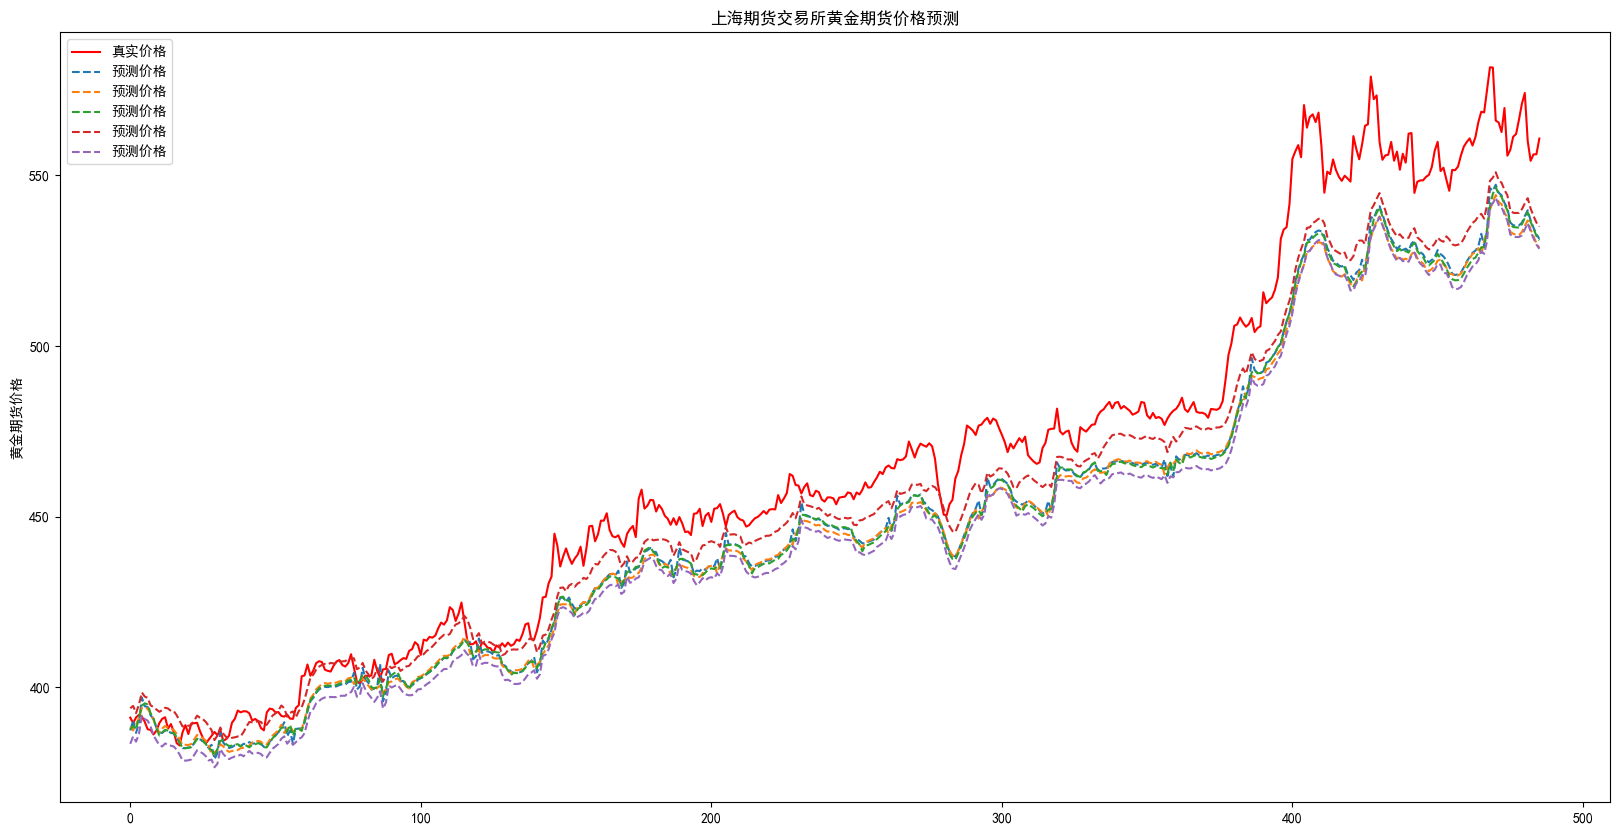

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.figure(figsize=(20,10))
plt.plot(np.exp(df.truth), 'r', label='真实价格')
plt.plot(np.exp(df.pred), '--', label='预测价格')
plt.title('上海期货交易所黄金期货价格预测')
plt.ylabel('黄金期货价格')
plt.legend()
plt.show()